<a href="https://colab.research.google.com/github/Vibhu-Maurya/Machine-Learning-project/blob/main/KNN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📘 KNN Digit Recognition using scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the digits dataset
digits = load_digits()

print("Dataset shape:", digits.data.shape)
print("Number of classes:", len(np.unique(digits.target)))
print("Feature shape:", digits.images.shape)


Dataset shape: (1797, 64)
Number of classes: 10
Feature shape: (1797, 8, 8)


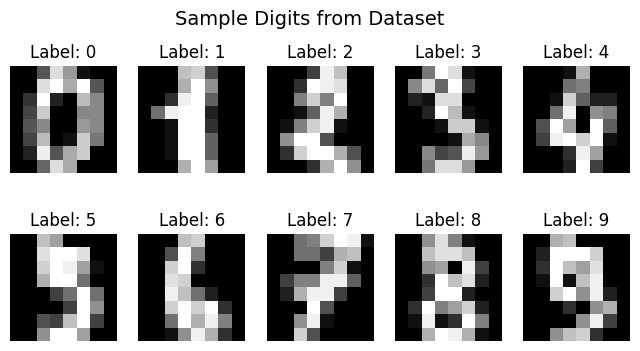

In [ ]:
# Show the first 10 digits
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.suptitle("Sample Digits from Dataset", fontsize=14)
plt.show()


In [ ]:
# Prepare features (X) and labels (y)
X = digits.data      # Flattened 8x8 = 64 features
y = digits.target    # Labels 0–9

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 1437
Testing samples: 360


In [ ]:
# Create a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

print("✅ Model training complete!")


✅ Model training complete!


In [ ]:
# Make predictions on test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy * 100:.2f}%\n")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))



✅ Model Accuracy: 98.33%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



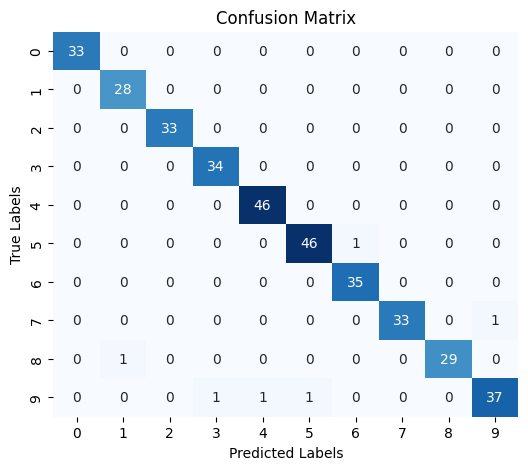

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


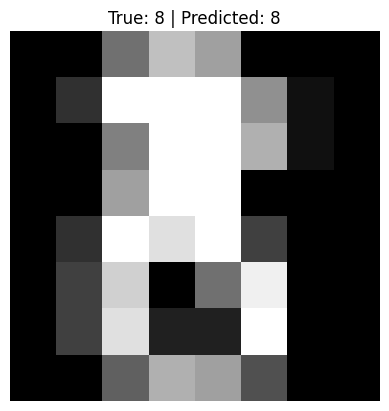

In [ ]:
# Pick a random test image
index = np.random.randint(0, len(X_test))
test_image = X_test[index]
true_label = y_test[index]
pred_label = knn.predict([test_image])[0]

# Show image and prediction
plt.imshow(test_image.reshape(8, 8), cmap='gray')
plt.title(f"True: {true_label} | Predicted: {pred_label}")
plt.axis('off')
plt.show()


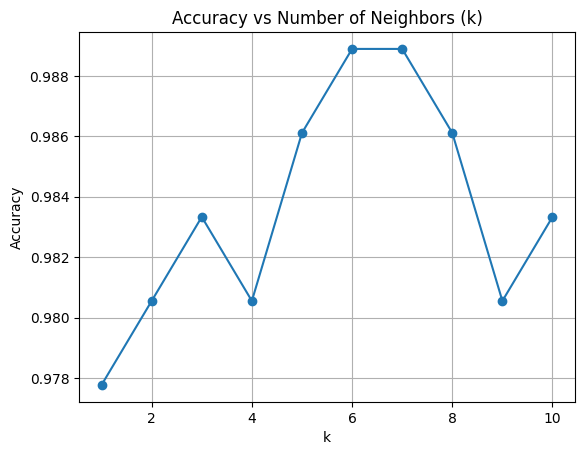

In [ ]:
# Test different values of k
accuracies = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
